In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
train_data_path = "/data/dataset/coco/records/coco_train2014_00000-of-00010.tfrecord"
filename = train_data_path
filename_queue = tf.train.string_input_producer([filename], num_epochs=2)
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(serialized_example,
            features={
                'image/img_id': tf.FixedLenFeature([], tf.int64),
                'image/encoded': tf.FixedLenFeature([], tf.string),
                'image/height': tf.FixedLenFeature([], tf.int64),
                'image/width': tf.FixedLenFeature([], tf.int64),
                'label/num_instances': tf.FixedLenFeature([], tf.int64),
                'label/gt_masks': tf.FixedLenFeature([], tf.string),
                'label/gt_boxes': tf.FixedLenFeature([], tf.string),
                'label/encoded': tf.FixedLenFeature([], tf.string),
            })

In [3]:
img_id = tf.cast(features['image/img_id'], tf.int32)
image_height = tf.cast(features['image/height'], tf.int32)
image_width = tf.cast(features['image/width'], tf.int32)
num_instances = tf.cast(features['label/num_instances'], tf.int32)
image = tf.decode_raw(features['image/encoded'], tf.uint8)
image = tf.reshape(image, (image_height, image_width, 3))
"""
imsize = tf.size(image)
image = tf.cond(tf.equal(imsize, image_height * image_width), \
      lambda: tf.image.grayscale_to_rgb(tf.reshape(image, (image_height, image_width, 1))), \
      lambda: tf.reshape(image, (image_height, image_width, 3)))
gt_boxes = tf.decode_raw(features['label/gt_boxes'], tf.float32)
gt_boxes = tf.reshape(gt_boxes, [num_instances, 5])
gt_masks = tf.decode_raw(features['label/gt_masks'], tf.uint8)
gt_masks = tf.cast(gt_masks, tf.int32)
gt_masks = tf.reshape(gt_masks, [num_instances, image_height, image_width])
"""
batch_size = 1
data_queue = tf.RandomShuffleQueue(capacity=100*batch_size, min_after_dequeue=10*batch_size,
            dtypes=(
                image.dtype, image_height.dtype, image_width.dtype))

enqueue_op = data_queue.enqueue((image, image_height, image_width))

data_queue_runner = tf.train.QueueRunner(data_queue, [enqueue_op] * 4)
tf.add_to_collection(tf.GraphKeys.QUEUE_RUNNERS, data_queue_runner)
# (image, ih, iw, gt_boxes, gt_masks, num_instances, img_id)
(image, image_height, image_width) = data_queue.dequeue()
#im_shape = tf.shape(image)
#image = tf.reshape(image, (im_shape[0], im_shape[1], im_shape[2], 3))

(480, 640)
END!


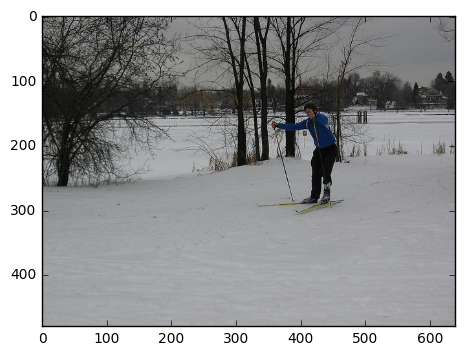

In [4]:
sess = tf.Session()
sess.run(tf.local_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
for i in range(1):
    im ,h, w = sess.run([image, image_height, image_width])
    print(h, w)
    plt.imshow(im)

print("END!")